In [1]:
import strawberryfields as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
#import h5py
#from datetime import datetime
#import seaborn as sns
#from utility import *

In [2]:
def OneModeCoherentHO(a,p,shots):
    """
    Function that performs sensing using a single coherent state and performing homodyne measurements
    
    Args:
    
        Ns (float) : Average number of photons in the #1 mode
        t,nth (float,float) : channel transmittivity and number of thermal photons for the thermal loss channel
        shots (integer) : number of repeated iid measurements to perform
    
    Returns:
    
        list, list (complex,complex): returns the complex signal <X>+i<P> of both modes
    """
    s1 = np.zeros(shots)
    
    for i in range(shots):
        prog= sf.Program(1)
        
        with prog.context as q:
            sf.ops.Coherent(a,p) | q[0] # State preparation
            sf.ops.MeasureX | q[0] # Het. Msmnt of signal 1

        # Need to run twice because of bug in the bosonic backend in dealing with repeated HD measurements
    
        eng = sf.Engine("bosonic")
        results = eng.run(prog)
    
        #Collecting the samples
        samples = results.all_samples
    
        #Creating the measurement records
        s1[i] = samples[0][0]
    
    # Interation over number of shots is done, outputing the records
    
    return s1


In [3]:
np.array.size?

Object `np.array.size` not found.


[1.15083787 1.266014   1.13459618 1.1295747  0.86829925 1.03534987
 1.41373208 0.73905469 1.15502316 1.12721631 0.60131877 1.10526435
 1.01304506 1.1639137  0.9121666  0.91221857 0.88989919 0.66895896
 1.01580705 0.8358952  0.89580835 1.21153617 1.01501019 1.12048129
 1.20435777 0.9722275  1.00875321 1.28456495 0.96581921 1.09942704
 0.90579988 1.24410851 1.18717882 1.32251521 0.8514153  1.13719578
 0.98615221 1.04468515 0.93982282 0.95602148 0.61676528 0.67148287
 1.0801254  1.00639228 1.17606899 1.04237434 0.85124885 1.1136882
 1.01693349 0.93655048 1.01517136 1.08076435 0.95740141 1.10229234
 1.07432592 0.74358407 1.41499345 1.21094266 0.83537768 1.18602141
 1.04699169 1.60643533 1.08029292 0.55939645 1.16455075 0.59260776
 1.1310116  1.14871712 0.6613899  0.88929323 0.82537175 1.2973725
 1.20926696 0.78503716 0.88142348 0.71844088 0.72915822 0.90478996
 0.91169233 1.01186773 1.03499563 1.01326533 0.71767937 1.22828562
 0.90088654 0.67835383 1.36889996 0.89046648 1.06443696 0.828951

<function matplotlib.pyplot.show(close=None, block=None)>

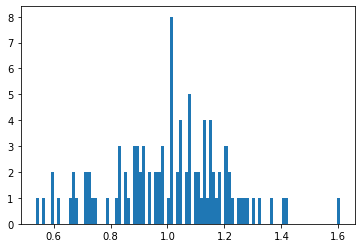

In [60]:
sample_set = np.zeros(100)
for i in range(sample_set.size):
    sample_set.put(i,np.mean(OneModeCoherentHO(1/2, 0, 30)))
    
print(sample_set)
plt.hist(sample_set,bins=100)
#plt.plot(sample_set)
plt.show

In [24]:
np.mean(sample_set)

0.9988182969605189

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


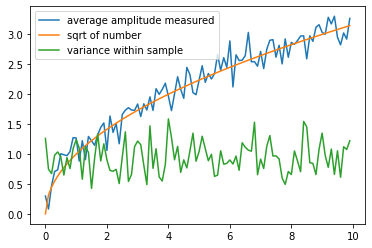

[0.29877692 0.0810492  0.47304079 0.70929328 0.73606208 1.00535302
 0.98840715 0.97347228 1.0403773  1.27402002 1.26917584 0.88249165
 1.22310142 0.90549852 1.29436856 1.22169656 1.14639971 1.31818364
 1.44586514 1.52101725 1.0602342  1.63659201 1.36222048 1.50929947
 1.17266449 1.66125775 1.73385524 1.77477913 1.73680687 1.72972858
 1.83572063 1.6277993  1.83989726 1.73646556 1.95481652 1.72957075
 2.09222815 1.99782207 2.0807829  2.18407621 1.96730544 1.72642452
 2.00612939 2.29241361 2.08267407 1.93211889 2.44838016 2.32891462
 2.02531889 1.99265944 2.23840073 2.47672113 2.1990097  2.34625094
 2.25475147 2.34388879 2.6629326  2.40141724 2.61104335 2.4497955
 2.89084582 2.12174756 2.6589097  2.56317171 2.56979204 2.64409154
 3.0332199  2.54260568 2.54429479 2.46841197 2.71543793 2.428511
 2.75183563 2.9018071  2.91234065 2.61930588 2.81803634 2.50773309
 2.92408264 2.61747499 2.86594596 2.83356629 2.89605116 2.97301401
 2.97548197 2.5911163  2.97574856 2.88387313 3.11955776 3.1616497

In [84]:
# test for systems with 1 to n photons
n_max = 10
steps = 100
shots = 30
x_set = np.arange(0,n_max, n_max/steps)
print(x_set)
all_value_set = np.zeros([steps, shots])
y_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    row = OneModeCoherentHO(np.sqrt(i*n_max/steps/4), 0, shots)
    #print(row)
    all_value_set[i] = row
    y_set.put(i, np.mean(all_value_set[i]))
    variance.put(i, np.var(all_value_set[i]))

plt.plot(x_set,y_set, label="average amplitude measured")
plt.plot(x_set, np.sqrt(x_set), label="sqrt of number")
plt.plot(x_set, variance, label="variance within sample")
plt.legend()
plt.show()
print(y_set)

In [85]:
np.mean(variance)

0.9450522456034607

[ 2.12351686e+02 -1.00611839e+01 -3.60494975e+00 -2.39695473e+00
 -4.56888637e+00 -3.62070934e+00 -4.20234484e+00 -3.17407082e+00
 -2.85877267e+00 -2.76969297e+00 -2.45831541e+00  1.12881175e+00
 -8.97817871e-01 -2.78731908e+00 -1.32566059e+00 -5.17999870e-01
 -1.36434676e+00 -1.65980780e+00 -4.65801593e-01 -1.11060417e+00
 -2.29672252e+00 -1.83991170e+00 -1.65332164e+00  1.31232510e-02
 -1.56371934e+00 -3.44309314e+00 -1.20640000e+00 -1.17255086e+00
 -9.47399111e-01 -2.61346783e+00  2.16607953e-02 -2.97392848e+00
 -8.47735676e-02 -6.10027177e-01 -1.35173980e+00 -3.25377631e-01
 -9.20442457e-01 -3.85079769e-01 -1.35821685e+00 -2.32044389e+00
 -1.68339977e+00 -7.31574139e-01 -1.11116534e+00 -1.54701656e-01
 -1.85382591e+00 -2.14918611e+00 -4.20445320e+00 -3.02787376e-01
 -1.91397070e+00 -2.51205788e+00  2.25676689e+00 -2.51205788e+00
 -1.91397070e+00 -3.02787376e-01 -4.20445320e+00 -2.14918611e+00
 -1.85382591e+00 -1.54701656e-01 -1.11116534e+00 -7.31574139e-01
 -1.68339977e+00 -2.32044

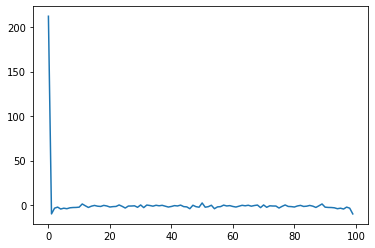

In [86]:
fourier = np.fft.fft(y_set)
plt.plot(np.real(fourier))
print(np.real(fourier))

In [88]:
def OneModeCoherentHD(a, p, shots):
    """
    Function that performs sensing using a single coherent state and performing heterodyne measurements

    Args:
    
        Ns (float) : Average number of photons in the #1 mode
        t,nth (float,float) : channel transmittivity and number of thermal photons for the thermal loss channel
        shots (integer) : number of repeated iid measurements to perform
    
    Returns:
    
        list, list (complex,complex): returns the complex signal <X>+i<P> of both modes
    
    
    
    """
    s1 = (1+1j)*np.zeros(shots)

    
    for i in range(shots):
        prog= sf.Program(1)
        
        with prog.context as q:
        
            sf.ops.Coherent(a, p) | q[0] # State preparation
            sf.ops.MeasureHD | q[0] # Het. Msmnt of signal 1


        # Need to run twice because of bug in the bosonic backend in dealing with repeated HD measurements
    
        eng = sf.Engine("bosonic")
        results = eng.run(prog)
        
    
        #Collecting the samples
        samples = results.all_samples
    
        #Creating the measurement records
        s1[i] = samples[0][0]
    
    # Interation over number of shots is done, outputing the records
    
    return s1


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


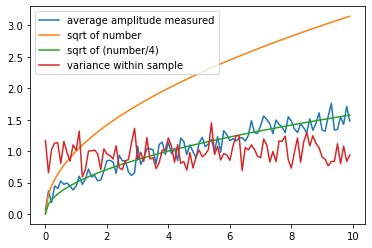

[0.05348131 0.36629861 0.17995981 0.44366651 0.4065439  0.52308964
 0.46974915 0.49334219 0.44500302 0.38313335 0.44114191 0.60031596
 0.47019832 0.55460119 0.71401951 0.58923334 0.61322902 0.52577321
 0.54026415 0.67829291 0.84726843 0.85268029 0.82595297 0.64495603
 0.93474004 0.8452793  0.84716667 0.66768435 0.61148754 0.65640796
 1.0775559  0.78876889 0.89008034 1.039349   1.03575209 1.02089866
 0.79569595 1.10442617 1.14314464 0.94630149 1.14006444 0.95693821
 1.04724205 0.84670091 1.20716587 1.15461449 0.94483322 1.09883408
 0.99018873 0.89095153 1.12962544 1.21958494 1.06839823 1.11475326
 1.18750041 0.99633749 1.22864858 0.98266897 1.32499085 1.26258559
 1.16642311 1.19801726 1.15944915 1.2084327  1.21486776 1.16063936
 1.24801238 1.4834681  1.29602253 1.28017436 1.40525686 1.56072516
 1.50284608 1.43466487 1.27761645 1.49353585 1.42565578 1.38381712
 1.29377819 1.54547528 1.47677583 1.35114141 1.29709486 1.43495446
 1.37259628 1.28581467 1.51201962 1.33083115 1.44123835 1.6106

In [92]:
# test for systems with 1 to n photons
n_max = 10
steps = 100
shots = 30
x_set = np.arange(0,n_max, n_max/steps)
print(x_set)
all_value_set = np.zeros([steps, shots])*(1+1j)
y_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    row = OneModeCoherentHD(np.sqrt(i*n_max/steps/4), 0, shots)
    #print(row)
    all_value_set[i] = row
    y_set.put(i, np.mean(np.real(all_value_set[i])))
    variance.put(i, np.var(all_value_set[i]))

plt.plot(x_set,y_set, label="average amplitude measured")
plt.plot(x_set, np.sqrt(x_set), label="sqrt of number")
plt.plot(x_set, np.sqrt(x_set/4), label="sqrt of (number/4)")
plt.plot(x_set, variance, label="variance within sample")
plt.legend()
plt.show()
print(y_set)

The behavior for heterodyne detection seems to obey expectations, while homodyne does not. Below, I create states with amplitude $a$ and phase 0, and then measure them in the x quadrature; you see that the measured amplitude is on average twice what I have set it to.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


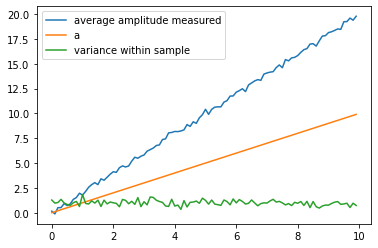

[ 0.15452683 -0.12292397  0.50860212  0.51414462  0.90793319  0.72417424
  0.88629775  1.3415888   1.52823419  1.96385032  1.77300216  2.14432097
  2.56924591  2.82943654  3.02856778  2.83099014  3.41309045  3.27079855
  3.57211043  3.87778703  4.125907    4.06836428  4.53120212  4.71333597
  4.60574665  4.70644131  5.19041021  5.58640877  5.48487057  5.69025321
  5.81210305  6.19531495  6.35190287  6.51018836  6.76537367  6.82849157
  7.37181997  7.43719148  8.04491351  8.08076821  8.18262325  8.16846183
  8.23177427  8.34705348  8.87917235  8.68862065  9.15745572  9.00026836
  9.55817698  9.87284618 10.41692158  9.90515459 10.40923108 10.62667552
 10.66462429 10.65850535 11.1400368  11.28462383 11.74650469 11.76016527
 12.14048549 12.29374517 12.48589182 12.19889731 12.8691161  13.07149128
 13.2752755  13.40324887 13.3340242  13.96168394 14.07584826 14.15766879
 14.20371247 14.61706006 14.88205134 14.60423006 15.42814387 15.29282923
 15.59377541 15.64780687 15.82787411 16.14947319 16

In [95]:
# test for systems with 1 to n photons
n_max = 10
steps = 100
shots = 30
x_set = np.arange(0,n_max, n_max/steps)
print(x_set)
all_value_set = np.zeros([steps, shots])
y_set = np.zeros(steps)
variance = np.zeros(steps)
for i in range(steps):
    a = x_set[i]
    row = OneModeCoherentHO(a, 0, shots)
    #print(row)
    all_value_set[i] = row
    y_set.put(i, np.mean(all_value_set[i]))
    variance.put(i, np.var(all_value_set[i]))

plt.plot(x_set,y_set, label="average amplitude measured")
plt.plot(x_set, x_set, label="a")
plt.plot(x_set, variance, label="variance within sample")
plt.legend()
plt.show()
print(y_set)